In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

(32, 32, 3)

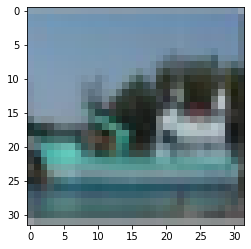

In [6]:
example_image = train_images[111, :, :, :]
plt.imshow(example_image)
example_image.shape

In [7]:
# Normalizes images and resizes them to 227x227
def image_preprocessor(image, label):
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image, (227, 227))
    return image, label

In [9]:
train_data_size = tf.data.experimental.cardinality(train_data).numpy()
train_data = (train_data.map(image_preprocessor).shuffle(buffer_size=train_data_size).batch(batch_size=32, drop_remainder=True))
test_data_size = tf.data.experimental.cardinality(test_data).numpy()
test_data = (test_data.map(image_preprocessor).shuffle(buffer_size=train_data_size).batch(batch_size=32, drop_remainder=True))

![picture](https://raw.githubusercontent.com/sarahiaguilar/my-alexnet/main/alexnet_architecture.png)


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.001), 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [ ]:
model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
